In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [9]:
tickers = ['AMZN', 'JPM', 'INTC', 'AAPL', 'AOR', 'EEM']
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='2009-1-1')['Adj Close']

**Normalization to 100:**

$$
\frac {P_t}{P_0} * 100
$$

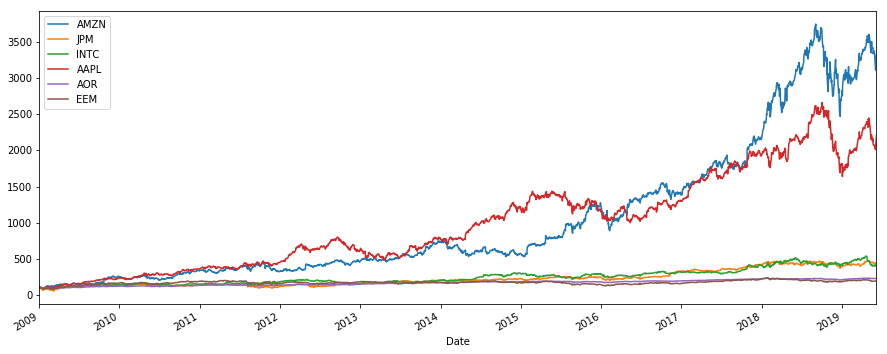

In [19]:
#The reasoning for * by 100 is to represent as if they were al starting from the same value
(my_data / my_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show()

**Calculating the Return of a Portfolio of Securities**

In [24]:
returns = (my_data / my_data.shift(1)) - 1
weights = np.array([0.36, 0.07, 0.04, 0.18, 0.32, 0.3])

In [31]:
#Calculates the dot product of two arrays
np.dot(returns, weights)

array([       nan, 0.00329485, 0.02803169, ..., 0.00261173, 0.00801141,
       0.01989094])

In [29]:
#Avereage annual returns by security
annual_returns = returns.mean() * 252
annual_returns

AMZN    0.393790
JPM     0.202480
INTC    0.171934
AAPL    0.333642
AOR     0.084999
EEM     0.090602
dtype: float64

In [41]:
print('The annulized average % return of this portfolio 1 is:')
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio_1)

The annulized average % return of this portfolio 1 is:
27.725%


In [43]:
#Adjusting weights on second portfolio
weights_2 = np.array([0.16, 0.17, 0.17, 0.16, 0.17, 0.17])
print('The annulized average % return of this portfolio 2 is:')
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print(pfolio_2)

The annulized average % return of this portfolio 2 is:
20.989%
